# Notebook to test visualization code

# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import plotting

# 2. Initialization

In [2]:
# 1. Init
exercise_classes = [
    "BodyWeightSquats",
    "HandstandPushups",
    "HandstandWalkin",
    "JumpingJack",
    "JumpRope",
    "Lunges",
    "PullUps",
    "PushUps",
    "TrampolineJumping",
    "WallPushUps"
]
num_classes = len(exercise_classes)
num_samples = 500 
num_epochs = 200

# 2. Sample data
# 2.1 CM
confusion_matrix = np.array([[50, 2, 1, 0, 0, 0, 0, 0, 0, 0],
                             [5, 45, 0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 48, 2, 0, 0, 0, 0, 0, 0],
                             [2, 0, 1, 47, 0, 0, 0, 0, 0, 0],
                             [12, 0, 0, 0, 49, 1, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 50, 0, 0, 0, 0],
                             [0, 6, 0, 34, 0, 0, 48, 1, 0, 1],
                             [0, 0, 0, 0, 0, 0, 0, 50, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0, 50, 0],
                             [0, 0, 5, 0, 0, 1, 0, 0, 0, 50]])

# 2.2 ROC AUC
y_true = np.random.randint(0, num_classes, size=num_samples)
y_score = np.random.rand(num_samples, num_classes)
y_score = y_score / y_score.sum(axis=1, keepdims=True)  


# 3. Sample data generating function

In [3]:
# Function to generate random data for a model
def generate_model_data(epochs):
    rows = []
    step = 0
    for epoch in range(epochs):  
        step +=  np.random.randint(10, 21)
        train_acc = np.random.uniform(0.7, 1.0) 
        train_loss = np.random.uniform(0.1, 0.5)  

        rows.append({
            'epoch': epoch, 
            'step': step,        
            'train_acc': train_acc,
            'train_loss': train_loss,
            'val_acc': np.nan,  
            'val_loss': np.nan  
        })

        val_acc = np.random.uniform(0.7, 1.0)   
        val_loss = np.random.uniform(0.1, 0.5)   

        rows.append({
            'epoch': epoch,  
            'step': step,           
            'train_acc': np.nan,  
            'train_loss': np.nan, 
            'val_acc': val_acc,
            'val_loss': val_loss
        })

    return pd.DataFrame(rows)

epochs = 200

# 2.3 Generate model training data
model_data = []
model_history = []
for i in range(1, 5):
    model_name = f"model_{i}"
    df = generate_model_data(epochs)
    hist = plotting.model_training_csv_to_history_dict(df)

    model_data.append(df)
    model_history.append(hist)

# 4. Plotting tests

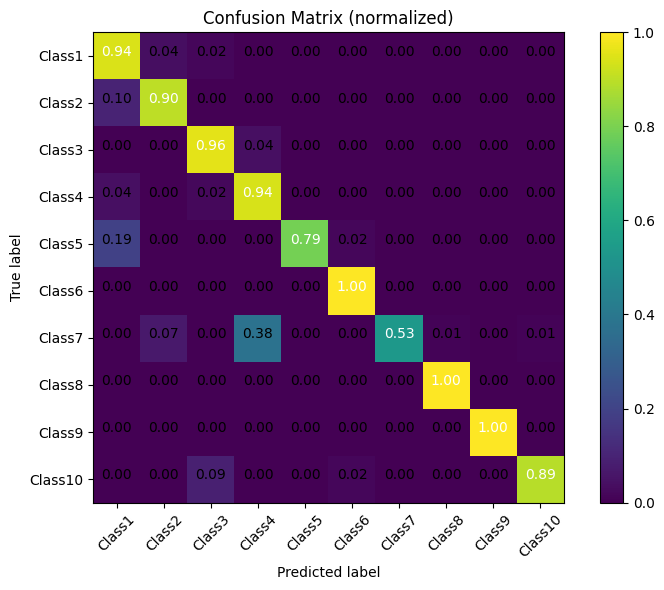

In [4]:
plotting.plot_confusion_matrix(confusion_matrix, normalize=True)

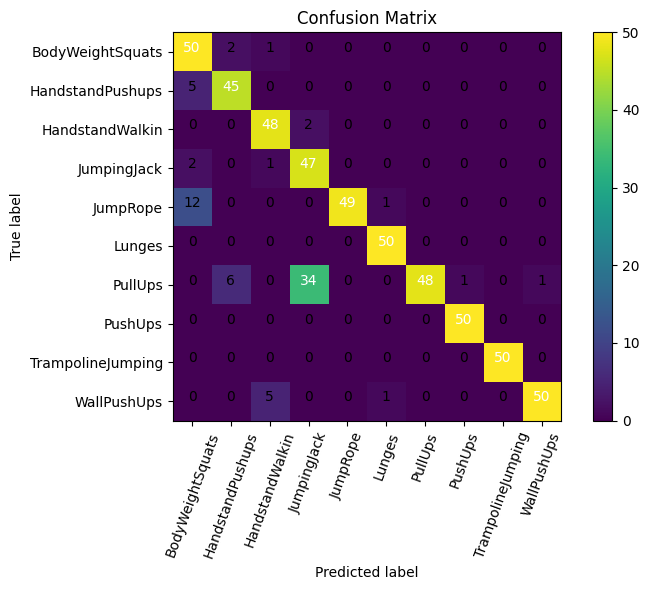

In [5]:
plotting.plot_confusion_matrix(confusion_matrix, class_names=exercise_classes, normalize=False, x_label_rotation = 70)

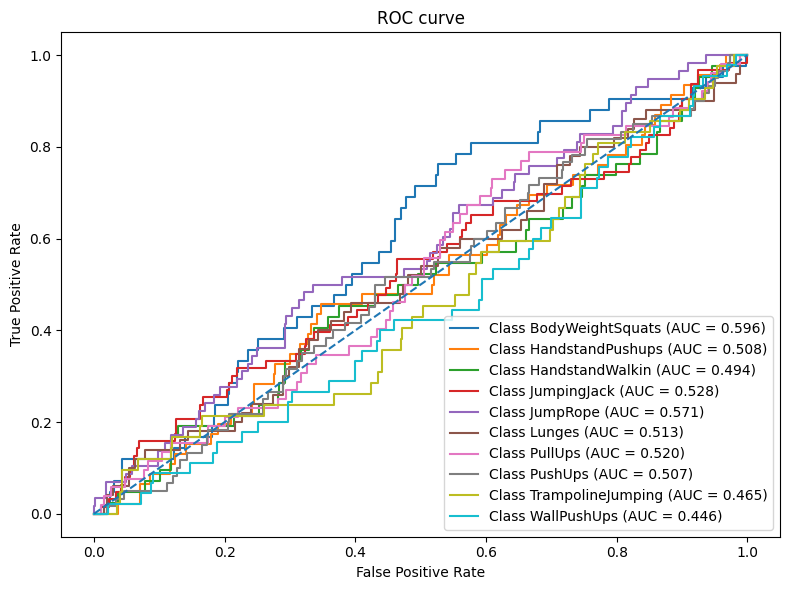

([0.5961218548554793,
  0.5079007852901742,
  0.49350176751923475,
  0.5275507609603719,
  0.5709158995163052,
  0.5129777777777779,
  0.5200892857142857,
  0.5070833333333333,
  0.46454564358494493,
  0.44600732600732595],
 np.float64(0.5146694434559234))

In [6]:
plotting.multiclass_roc_auc(y_true, y_score, exercise_classes)

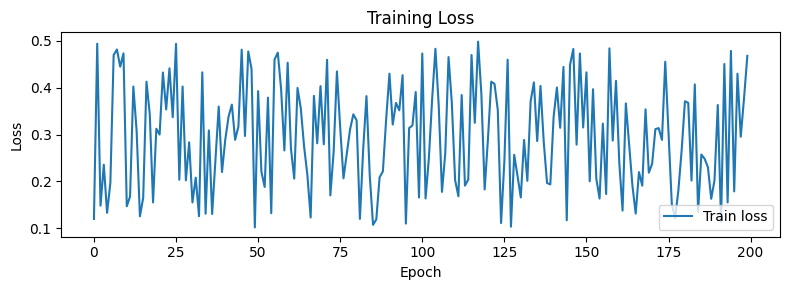

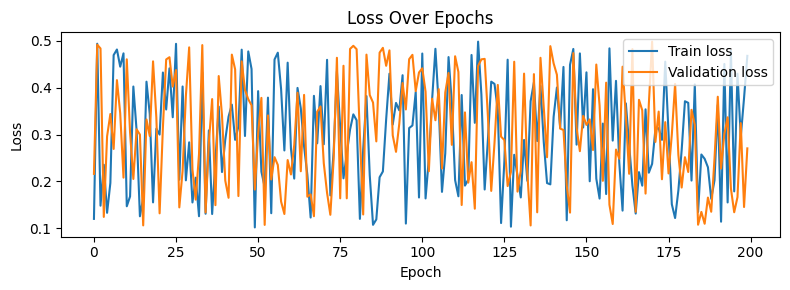

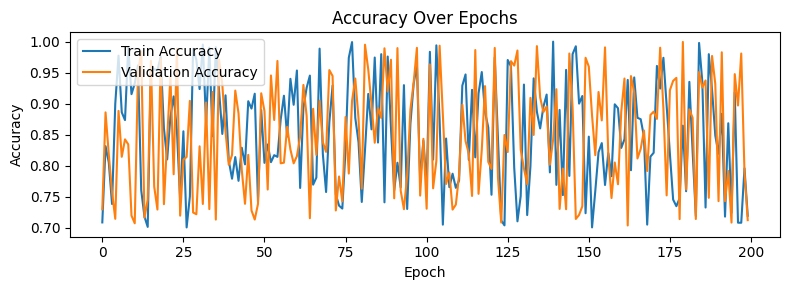

In [7]:
plotting.plot_history(model_history[1])

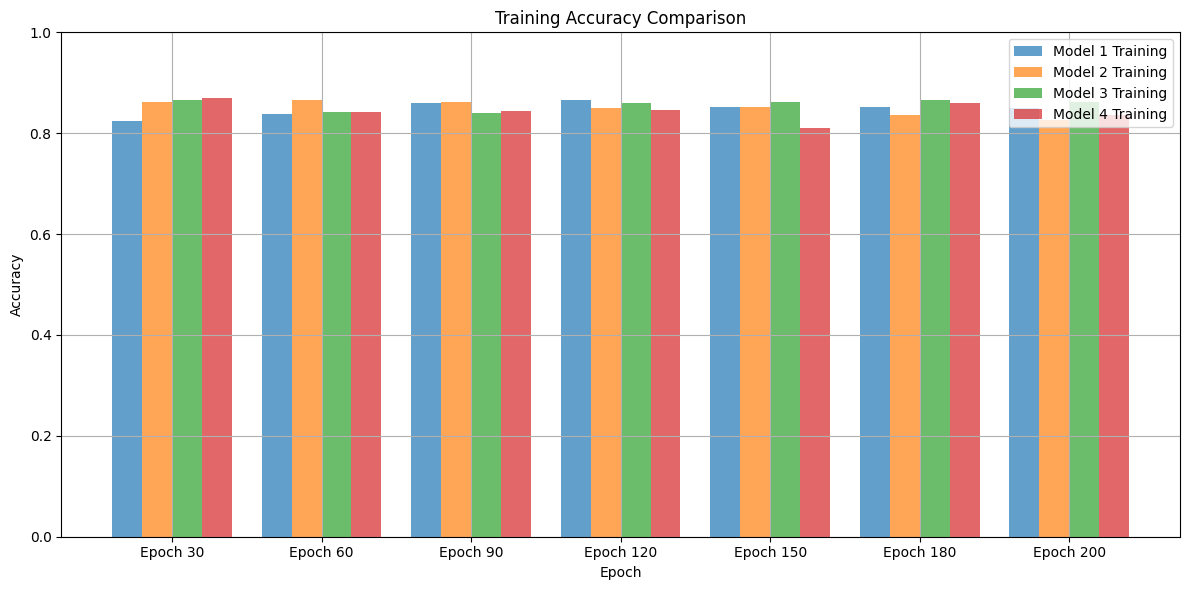

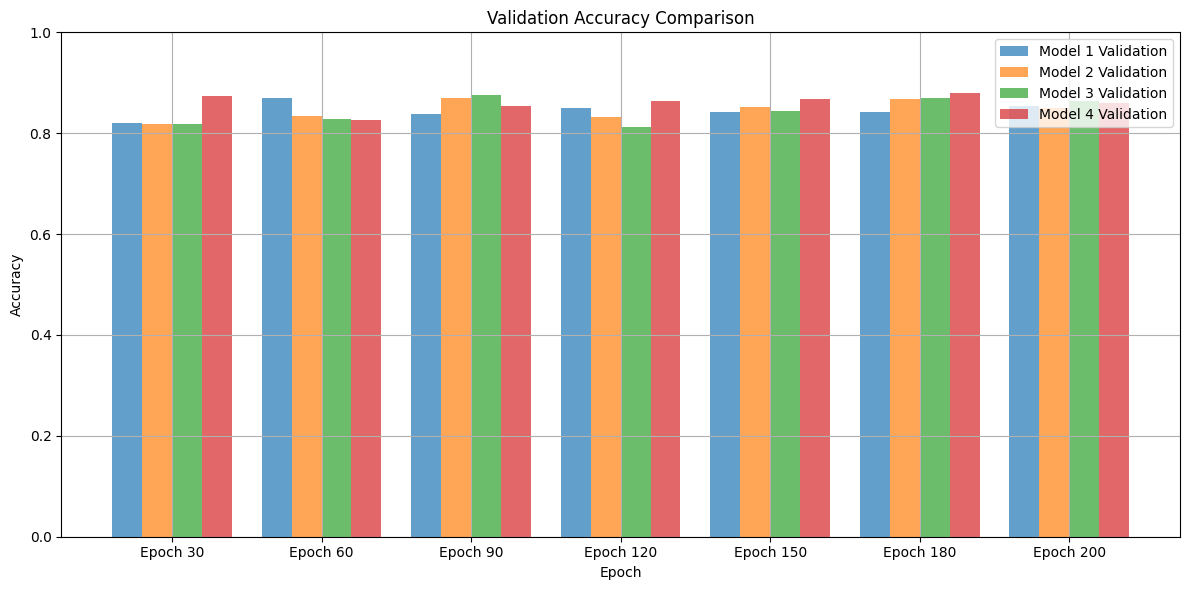

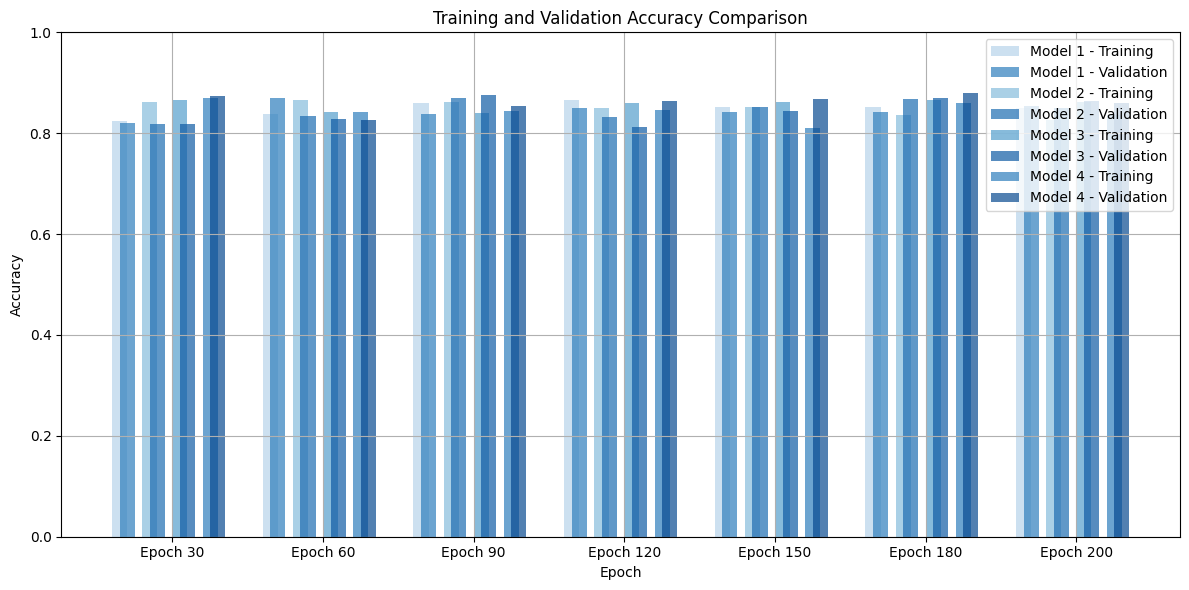

In [8]:
plotting.plot_accuracies(model_data, epoch_span=30, bar_width=0.2)